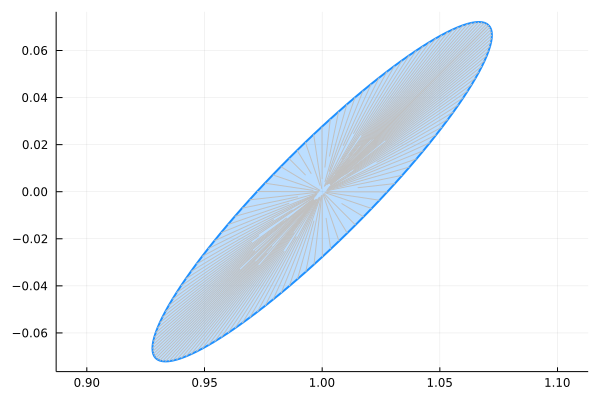

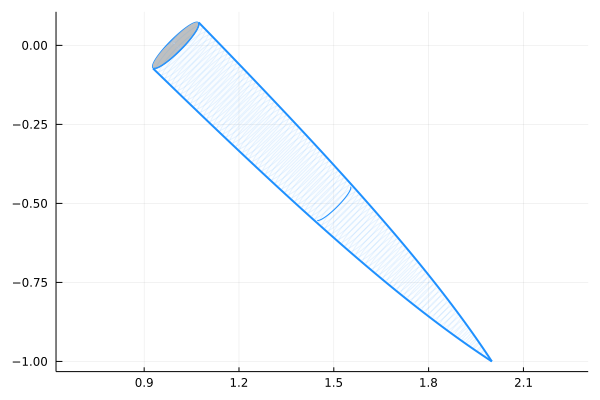

In [49]:
#trying to draw worms
function makeWormCircle(c,n,half=false,squish=0.2,nθ=64,r=1,left=false)
    cx,cy = c
    circlex = [r*sin(θ)*squish for θ=0:(2π/nθ):2*π] #squish points in x direction to make ellipse
    circley = [r*cos(θ) for θ=0:(2π/nθ):2*π]
    θ = atan(n[2],n[1]) #what angle should we point at? Use passed in unit vector [1,0] means point in x, [1,1] point up 45 degrees, [0,1] point in y, etc
    wormx = [deepcopy(circlex[i])*cos(θ)-deepcopy(circley[i])*sin(θ) for i=1:length(circlex)].+cx #rotation matrix, centered on our cx and cy
    wormy = [deepcopy(circlex[i])*sin(θ)+deepcopy(circley[i])*cos(θ) for i=1:length(circley)].+cy #need to add center points at end because otherwise we rotate them too!
    if half == false
        #spokes for "teeth"
        mod = min.(rand(length(circlex)).+0.5,0.95)
        Δx = [cx-cxi for cxi in wormx].*mod #maximum separations to center 
        Δy = [cy-cyi for cyi in wormy].*mod #with random shortening for teeth
        return wormx,wormy,Δx,Δy
    else
        halfInd = convert(Int,(length(wormx)-1)/2) #-1 because degeneracy with 0 and 2π
        if left == false
            return wormx[1:halfInd],wormy[1:halfInd] #worm travelling to the left
        else
            return wormx[halfInd:end],wormy[halfInd:end] #travelling to the right
        end
    end
end


using Plots
plot(makeWormCircle([1,-1],[-1,0],true),aspect_ratio=:equal)   
wormx,wormy,Δx,Δy=makeWormCircle([0,0],[0,0])
p = plot(wormx,wormy,aspect_ratio=:equal,lw=2,c=:dodgerblue)
function makeWormHead(p,c,n; color=:dodgerblue,squish=0.2,nθ=128,r=1,left=false)
    wormx,wormy,Δx,Δy=makeWormCircle(c,n,false,squish,nθ,r,left)
    p = plot!(wormx,wormy,lw=2,c=color,fill=true,fillalpha=0.3,label="")
    for i=1:length(wormx)
        p = plot!([wormx[i],wormx[i]+Δx[i]],[wormy[i],wormy[i]+Δy[i]],c=:silver,label="") #spoke teeth
    end
    halfInd = convert(Int,(length(wormx)-1)/2)
    return p, wormx[1],wormx[halfInd],wormy[1],wormy[halfInd]
end

p=plot(aspect_ratio=:equal)
p,params... = makeWormHead(p,[1.,0.],[1.,-1.],r=0.1)
display(p)
using Distributions
function makeWormTail(p,c,cMid,cEnd,n,nMid; color=:dodgerblue,squish=0.2,nθ=128,rStart=1,left=false)
    lastSegX,lastSegY = makeWormCircle(c,n,true,squish,nθ,rStart,left)
    #θ1=atan(c[2],c[1]); θ2=atan(cEnd[2],cEnd[1]); θRange = range(θ1,stop=θ2,length=101)
    xCen = vcat(range(c[1],stop=cMid[1],length=51)[1:end-1],range(cMid[1],stop=cEnd[1],length=51)); yCen = vcat(range(c[2],stop=cMid[2],length=51)[1:end-1],range(cMid[2],stop=cEnd[2],length=51))
    topTailY = zeros(101); bottomTailY = zeros(101)
    topTailX = zeros(101); bottomTailX = zeros(101)
    r = reverse(rStart.-exp.(range(log(rStart),stop=-5,length=101)))
    midSegX,midSegY = makeWormCircle(cMid,nMid,true,squish,nθ,r[50],left)
    p = plot!(lastSegX,lastSegY,c=color,label="")
    p = plot!(midSegX,midSegY,c=color,label="")
    for i=1:101
        wormx,wormy = makeWormCircle([xCen[i],yCen[i]],n,false,squish,nθ,r[i]*1.1,left)
        halfInd = convert(Int,(length(wormx)-1)/2)
        plot!(wormx,wormy,label="",c=color,fill=true,fillalpha=0.01,linealpha=0.1)
        topTailX[i] = wormx[1]; bottomTailX[i] = wormx[halfInd]
        topTailY[i] = wormy[1]; bottomTailY[i] = wormy[halfInd]
    end
    p = plot!(bottomTailX,bottomTailY,lw=2,c=color,label="")
    p = plot!(topTailX,topTailY,lw=2,c=color,label="")
    return p
end

p = makeWormTail(p,[1.,0.],[1.5,-0.5],[2.,-1.],[1.,-1.],[1.,-1.],rStart=0.1)

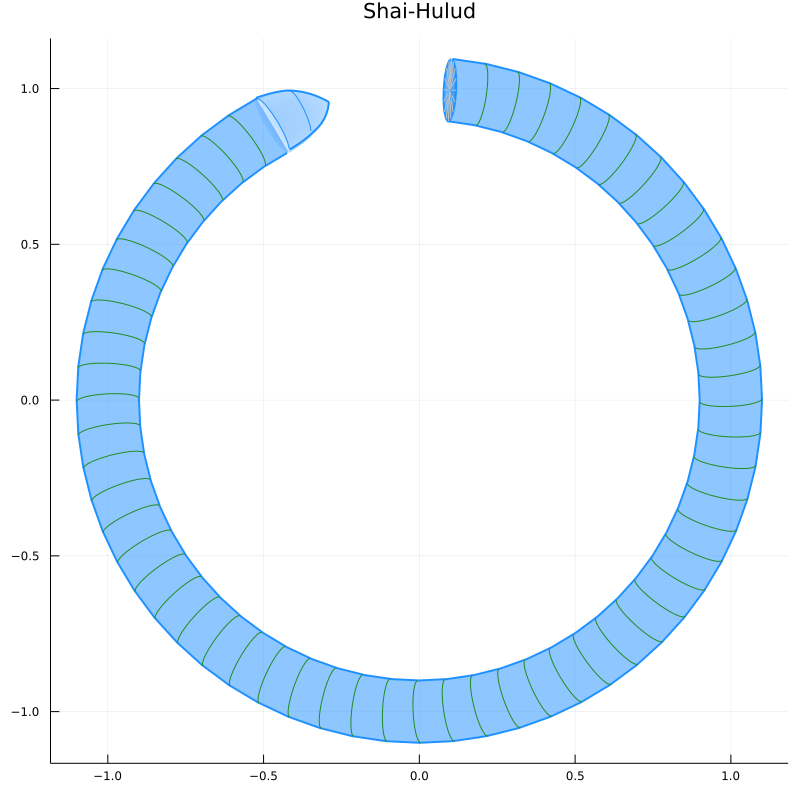

In [12]:
r = 1
Circlex = ([r*sin(θ) for θ=0:π/32:2*π])
Circley = ([r*cos(θ) for θ=0:π/32:2*π])

p = plot(Circlex[2:end-5],Circley[2:end-5],color=:dodgerblue,aspect_ratio=:equal,label="",lw=61,linealpha=0.5,size=(800,800),title="Shai-Hulud") #lw = 30 corresponds to worm of 0.1 in size
outerX = [1.1*r*sin(θ) for θ=0:π/32:2*π]
innerX = [0.9*r*sin(θ) for θ=0:π/32:2*π]
outerY = [1.1*r*cos(θ) for θ=0:π/32:2*π]
innerY = [0.9*r*cos(θ) for θ=0:π/32:2*π]
p = plot!(innerX[2:end-5],innerY[2:end-5],lw=2,label="",c=:dodgerblue)
p = plot!(outerX[2:end-5],outerY[2:end-5],lw=2,label="",c=:dodgerblue)

for i=2:length(Circlex)-5
    n = [Circlex[i]-Circlex[i-1],Circley[i]-Circley[i-1]]./√((Circlex[i]-Circlex[i-1])^2+(Circley[i]-Circley[i-1])^2)
    half = false; left = false
    if i==(length(Circlex)-5)
        nMid = [Circlex[i+1]-Circlex[i],Circley[i+1]-Circley[i]]./√((Circlex[i+1]-Circlex[i])^2+(Circley[i+1]-Circley[i])^2)
        p = makeWormTail(p,[Circlex[i],Circley[i]],[Circlex[i+1],Circley[i+1]],[Circlex[i+2],Circley[i+2]],n,nMid,left=left,rStart=0.1,nθ=16)
    elseif i>2
        half = true
        wormSegment = makeWormCircle([Circlex[i],Circley[i]],n,half,0.2,64,0.1)
        p = plot!(wormSegment,c=:forestgreen,label="")
    else
        if sign(n[1]) == -1 #worm travelling left
            left = true
        end
        p = makeWormHead(p,[Circlex[i],Circley[i]],n,r=0.1,nθ=16,left=left)
    end
end
display(p)

┌ Info: Saved animation to 
│   fn = /home/kirk/Documents/3Body/Dune/tmp.gif
└ @ Plots /home/kirk/.julia/packages/Plots/yiUpW/src/animation.jl:104


Plots.AnimatedGif("/home/kirk/Documents/3Body/Dune/tmp.gif")
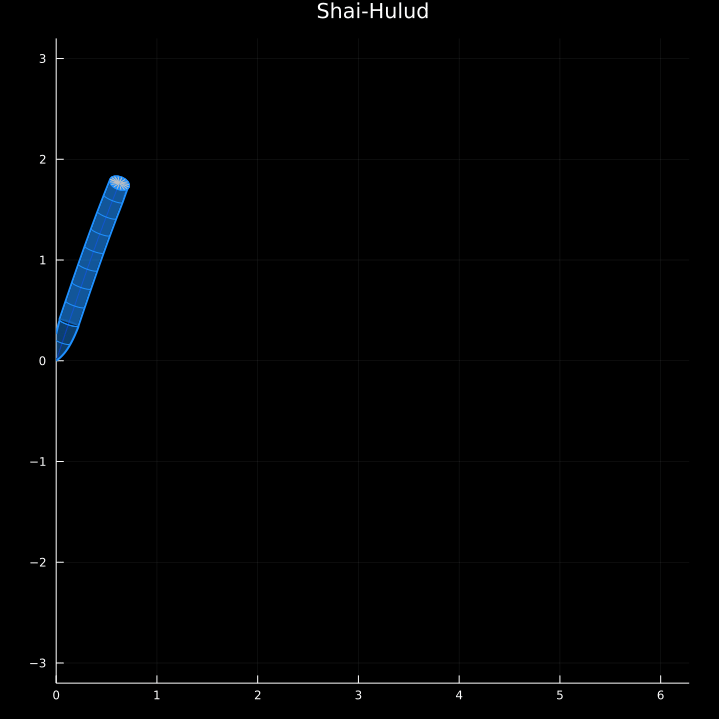

In [13]:
x = range(0,stop=2π,length=101); y = sin.(x).*3

#color=:dodgerblue,squish=0.2,nθ=128,r=1,left=false
function makeShaiHulud(p,xPts,yPts; r=0.1,c=:dodgerblue,lw=30,nθ=64,squish=0.2)
    n0 = [(xPts[1]-xPts[2]),(yPts[1]-yPts[2])]./√((xPts[2]-xPts[1])^2+(yPts[2]-yPts[1])^2)
    half = false; left = false
    if sign(n0[1]) == -1 #worm travelling left
        left = true
    end
    p,startPoints... = makeWormHead(p,[xPts[1],yPts[1]],n0,color=c,squish=squish*3,r=r,nθ=16,left=left) #first let's make the head, opening angle larger to see teeth
    wormBottomX = zeros(length(xPts)-2); wormBottomY = zeros(length(yPts)-2); wormTopX = zeros(length(xPts)-2); wormTopY = zeros(length(yPts)-2)
    wormBottomX[1] = startPoints[1]; wormTopX[1] = startPoints[2]; wormBottomY[1] = startPoints[3]; wormTopY[1] = startPoints[4]
    for i=2:length(xPts)-2 #draw the body segments
        half = true
        n = [xPts[i]-xPts[i-1],yPts[i]-yPts[i-1]]./√((xPts[i]-xPts[i-1])^2+(yPts[i]-yPts[i-1])^2)
        wormx,wormy = makeWormCircle([xPts[i],yPts[i]],n,half,squish,nθ,r,left)
        p = plot!(wormx,wormy,c=c,label="")
        if left == false
            wormBottomX[i] = wormx[end]; wormBottomY[i] = wormy[end]; wormTopX[i] = wormx[1]; wormTopY[i] = wormy[1]
        else
            wormBottomX[i] = wormx[1]; wormBottomY[i] = wormy[1]; wormTopX[i] = wormx[end]; wormTopY[i] = wormy[end]
        end
    end
    p = plot!([wormBottomX,wormTopX],[wormBottomY,wormTopY],color=c,lw=2,label="") #outline of worm
    p = plot!(xPts[1:end-2],yPts[1:end-2],lw=lw,c=c,linealpha=0.6,label="")
    p,startPoints... = makeWormHead(p,[xPts[1],yPts[1]],n0,color=c,squish=squish*3,r=r,nθ=16,left=left) #this is lazy, but want head to be on top of line so plot it *again* here since no zorder in GR
    n = [xPts[end-1]-xPts[end-2],yPts[end-1]-yPts[end-2]]./√((xPts[end-1]-xPts[end-2])^2+(yPts[end-1]-yPts[end-2])^2)
    nMid = [xPts[end]-xPts[end-1],yPts[end]-yPts[end-1]]./√((xPts[end]-xPts[end-1])^2+(yPts[end]-yPts[end-1])^2)
    p = makeWormTail(p,[xPts[end-2],yPts[end-2]],[xPts[end-1],yPts[end-1]],[xPts[end],yPts[end]],n,nMid,left=left,rStart=r,nθ=16,color=c) #make the tail
    return p
end

function plotTest(x,y)
    p = plot(x,y,c=:darkblue,label="",aspect_ratio=:equal,ylims=(-3.2,3.2),xlims=(0,2*π),size=(720,720),title="Shai-Hulud",background_color=:black)
    p = makeShaiHulud(p,x,y,lw=18,r=0.1)
end
# makeShaiHulud(p,reverse(x[1:10]),reverse(y[1:10]),lw=18)
@gif for i ∈ 11:length(x)
    p = plotTest(reverse(x[i-10:i]),reverse(y[i-10:i]))
end

┌ Info: Saved animation to 
│   fn = /home/kirk/Documents/3Body/Dune/tmp.gif
└ @ Plots /home/kirk/.julia/packages/Plots/yiUpW/src/animation.jl:104


Plots.AnimatedGif("/home/kirk/Documents/3Body/Dune/tmp.gif")
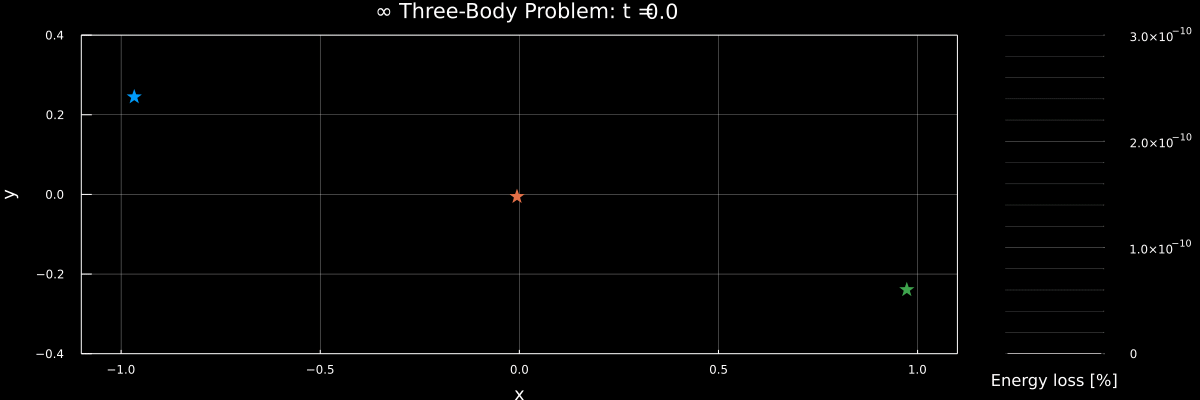

In [4]:
function Δr(coords,masses,nBodies,G) #this is a generalized version of what we had before for nBodies, different masses, and different values of G
    x,y,vx,vy = deepcopy(coords) #in Julia saying a = b just sets pointers by default, this creates a physical copy in memory
    Δ = deepcopy(coords)
    for n=1:nBodies
        xn = x[n]; yn = y[n] #assign them new variables here for computational efficiency, minimize calls to access memory
        Δvx = 0.; Δvy = 0.
        for i=1:nBodies #generalizing for later n-body problem
            if i!=n #only calculate if not self
                sep = sqrt((xn-x[i])^2+(yn-y[i])^2) #euclidean distance
                Δvx -= G*masses[i]*(xn - x[i])/sep^3 #change in velocity from each mass on mass n
                Δvy -= G*masses[i]*(yn - y[i])/sep^3
            end
        end
        Δ[3][n] = Δvx #change in velocity = a*t
        Δ[4][n] = Δvy
    end
    Δ[1] = vx #change in position = v*t
    Δ[2] = vy
    return Δ
end

function step!(coords,masses,Δt,nBodies=3,G=6.67408313131313e-11) #1 RK4 step for each body's coordinates, mutates coords
    k1 = Δt.*Δr(coords,masses,nBodies,G)
    k2 = Δt.*Δr(coords .+ k1./2,masses,nBodies,G)
    k3 = Δt.*Δr(coords .+ k2./2,masses,nBodies,G)
    k4 = Δt.*Δr(coords .+ k3,masses,nBodies,G)
    coords .+= (k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)./6
    return coords #return changes in position and velocity
end

#Initial conditions setup -- you can modify these to make whatever three-body animations you want!
M = [1,1,1] #m1=m2=m3
x = [-0.97000436,0.,0.97000436] #x1 = -x3, x2 = 0
y = [0.24208753,0.,-0.24208753] #y1 = -y3, y2 = 0
vx = [0.4662036850,-0.933240737,0.4662036850] #v1x = v3x
vy = [0.4323657300,-0.86473146,0.4323657300] #v1y = v3y
Ei = -1/√((2*0.97000436)^2+(2*0.24208753)^2) - 2/√(0.97000436^2+0.24208753^2) + 0.5*sum(vx.^2 .+ vy.^2)#r23 = r12

coords = [x,y,vx,vy] #array of initial conditions 
time = range(0,stop=6.3259,length=1001); Δt = time[2]-time[1] #the periodicity of this system is ~6.3259 in these natural units

X = zeros(3,length(time)); Y = zeros(3,length(time)); VX = zeros(3,length(time)); VY = zeros(3,length(time)) #initialize tracking arrays
for i = 1:length(time)
    coords = step!(coords,M,Δt,3,1) #evolve the system at each time step
    X[:,i] = coords[1]; Y[:,i] = coords[2] #keep track of position at each time step
    VX[:,i] = coords[3]; VY[:,i] = coords[4]
end

using Plots.Measures
#make a simple animation of our results
@gif for i=1:length(time)
    p1=plot(size=(1000,400),widen=true,aspect_ratio=:equal,xlims=(-1.1,1.1),ylims=(-0.4,0.4),xlabel="x",ylabel="y",title="∞ Three-Body Problem: t = ",
    background_color=:black,gridalpha=0.5,minorgridalpha=0.3,framestyle=:box,margins=4mm,titlefonthalign=:left,titlefontsize=14,guidefontsize=10,labelfontsize=12)
    #p1=annotate!(0.6,1.,Plots.text("$(round(time[i],sigdigits=3))","white",14))
    p1=annotate!([(0.32,0.46,("$(round(time[i],sigdigits=3))",14,:white,:left))]) #because it really annoys me when the title bounces around as the number changes
    p1=plot!(X[1,1:i],Y[1,1:i],label="",lw=2,linealpha=max.((1:i) .+ 100 .- i,20)/100)
    p1=plot!(X[2,1:i],Y[2,1:i],label="",lw=2,linealpha=max.((1:i) .+ 100 .- i,20)/100)
    p1=plot!(X[3,1:i],Y[3,1:i],label="",lw=2,linealpha=max.((1:i) .+ 100 .- i,20)/100)
    p1=scatter!([X[1,i]],[Y[1,i]],label="",marker=:star,c=1,markerstrokewidth=0,markersize=8)
    p1=scatter!([X[2,i]],[Y[2,i]],label="",marker=:star,c=2,markerstrokewidth=0,markersize=8)
    p1=scatter!([X[3,i]],[Y[3,i]],label="",marker=:star,c=3,markerstrokewidth=0,markersize=8)
    r12 = √((X[1,i]-X[2,i])^2+(Y[1,i]-Y[2,i])^2); r13 = √((X[1,i]-X[3,i])^2+(Y[1,i]-Y[3,i])^2); r23 = √((X[3,i]-X[2,i])^2+(Y[3,i]-Y[2,i])^2)
    U = -1/r12 - 1/r13 - 1/r23 #G = m = 1
    K = 0.5*sum(VX[:,i].^2 .+ VY[:,i].^2) #m=1
    ΔE = abs((U+K-Ei)/Ei)
    p2 = bar([ΔE],ylims=(0,3e-10),label="",xticks=false,xlabel="Energy loss [%]",ylabel="",grid=true,minorgrid=true,minorgridalpha=0.3,gridalpha=0.5,
        background_color=:black,framestyle=:grid,margins=3mm,c=:crimson,ymirror=true,widen=false,tickdirection=:out,yticks=true,yminorticks=true)
    #p2 = hline!([0.,1e-10,2e-10,3e-10],c=:white,label="")
    plot(p1,p2,layout=@layout([A B{0.1w}]),size=(1200,400))
end every 10

In [5]:
function detectCollisionsEscape(coords,Δt,maxSep,R=nothing) #this tells us if two bodies have "collided" or one has "escaped"
    x,y,vx,vy = coords
    V = sqrt.(vx.^2 .+ vy.^2)
    if R == nothing
        R = V.*Δt
    end
    collision = false; collisionInds = nothing; escape = false; escapeInd = nothing
    for n=1:length(x)
        rn = R[n]; xn = x[n]; yn = y[n]
        for i=1:length(x) 
            if i!=n #don't check if we collided with ourselves!
                minSep = rn+R[i]
                sep = √((xn-x[i])^2+(yn-y[i])^2)
                if sep<minSep #collision!
                    collision = true
                    collisionInds = n,i
                    return collision,collisionInds,escape,escapeInd
                elseif sep>maxSep #escape!
                    escape = true
                    escapeInd = n
                    return collision,collisionInds,escape,escapeInd
                end
            end
        end
    end
    return collision,collisionInds,escape,escapeInd
end

detectCollisionsEscape (generic function with 2 methods)

In [207]:
#solution to exercise 2
using Distributions,Printf
function nBodyStep!(coords,masses,Δt,maxSep,nBodies,R,G=6.67408313131313e-11) #similar to our step function before, but keeping track of collisions
    coords = step!(coords,masses,Δt,nBodies,G) #update the positions as we did before
    collision,collisionInds,escape,escapeInd = detectCollisionsEscape(coords,Δt,maxSep,R) #detect collisions/escapes
    if collision == true #do inelastic collision and delete extra body (2 -> 1)
        i1,i2 = collisionInds
        x1,x2 = coords[1][i1],coords[1][i2]
        y1,y2 = coords[2][i1],coords[2][i2]
        vx1,vx2 = coords[3][i1],coords[3][i2]
        vy1,vy2 = coords[4][i1],coords[4][i2]
        px1,px2 = masses[i1]*vx1,masses[i2]*vx2
        py1,py2 = masses[i1]*vy1,masses[i2]*vy2
        px = px1+px2
        py = py1+py2
        newM = masses[i1]+masses[i2]
        vfx = px/newM
        vfy = py/newM
        coords[1][i1] = (x1*masses[i1]+x2*masses[i2])/(masses[i1]+masses[i2]) #center of mass
        coords[2][i1] = (y1*masses[i1]+y2*masses[i2])/(masses[i1]+masses[i2])
        coords[3][i1] = vfx
        coords[4][i1] = vfy
        deleteat!(coords[1],i2); deleteat!(coords[2],i2); deleteat!(coords[3],i2); deleteat!(coords[4],i2)
        masses[i1] = newM
        deleteat!(masses,i2)
        nBodies-=1
    end
    #could also implement condition for escape where we stop calculating forces but I'm too lazy for now
    return coords,masses,nBodies,collision,collisionInds,escape,escapeInd
end

function genNBodyResults(nBodies,tStop,nTPts,nBodiesStop=10,R=nothing,mOut=10,G=6.67408313131313e-11)
    coords = [zeros(nBodies),zeros(nBodies),zeros(nBodies),zeros(nBodies)] 
    Mstar = 2e30; Mworm = Mstar/1e4; Mmoon = 5*Mstar/1e3
    for i=2:nBodies #initialize coordinates on ~Keplerian orbits
        accept = false; r = nothing; DMoon = 0.2; rMoon = 2.75
        while accept == false #prevent a particle from spawning within 0.2 AU too close to "star"
            if i<nBodies-1
                r = 1.5e11+1.5e11/1000*rand(Uniform(-1,1))
            else
                if i == nBodies-1
                    r = rMoon*1.5e11 #perturb the positions ever so slightly for worms, moons at 2AU and 1.5AU
                else
                    r = (rMoon-DMoon)*1.5e11
                end
            end
            if r/1.5e11 > 0.2
                accept = true
            end
        end
        θ = i<nBodies-1 ? 2π/3*i : π/2 #separate Atreides, Harkonnen, and Fremen by thirds, put moons at π/2
        x = r*cos(θ); y = r*sin(θ)
        v = √(G*Mstar/r)
        if i < nBodies-1
            v += v/100*rand(Uniform(-1,1)) #perturb the velocities ever so slightly 
        end
        θ = atan(y,x)
        coords[1][i] = x; coords[2][i] = y
        coords[3][i] = -v*sin(θ); coords[4][i] = v*cos(θ)
        if i == nBodies
            vMoon = √(G*Mmoon/(DMoon*1.5e11*2))
            coords[3][i] -= vMoon
        elseif i == nBodies-1
            vMoon = √(G*Mmoon/(DMoon*1.5e11*2))
            coords[3][i] += vMoon
        end
    end

    masses = Mworm.*ones(nBodies) #initialize masses
    masses[1] = Mstar #make index one special as the central star
    masses[end-2:end] .= Mmoon #last two are the moons I guess
    coords[1][1] = 0.; coords[2][1] = 0.; coords[3][1] = 0.; coords[4][1] = 0. #initialize central star at origin with no velocity
    sysVx = sum([masses[n]*coords[3][n] for n=1:nBodies])/sum(masses); sysVy = sum([masses[n]*coords[4][n] for n=1:nBodies])/sum(masses)
    coords[3][:] .-= sysVx; coords[4][:] .-= sysVy #CoM frame
    yearSec = 365*24*3600
    time = range(-101/nTPts,stop=tStop,length=nTPts).*yearSec #years -> s
    t = time[1]; Δt = time[2]-time[1]; tInd = 1
    coordsRecord = [deepcopy(coords)]; massRecord = [deepcopy(masses)] #initialize records with initial conditions
    escape = false
    while tInd<length(time) && nBodies > nBodiesStop && escape == false#keep going until we get to maximum time or most things have collided
        coords,masses,nBodies,collision,collisionInds,escape,escapeInd = nBodyStep!(coords,masses,Δt,10*1.5e11,nBodies,R,G) #update 
        if tInd%mOut == 0
            push!(coordsRecord,deepcopy(coords)); push!(massRecord,deepcopy(masses)) #add to records
        end
        tInd += 1
        t = time[tInd]
    end
    return coordsRecord,massRecord,time[1:mOut:tInd]
end
R = [0.06*1.5e11 for i=1:6]; R[1] = 0.2*1.5e11; R[end-2:end] .= 0.05; yearSec = 365*24*3600
coordsRecord,massRecord,t = genNBodyResults(6,60,60001,5,R,1);  
println("final time = $(t[end]/yearSec) years with $(length(massRecord[end])) bodies remaining")
println(length(massRecord))
println(length(t))

final time = 46.399618450803594 years with 5 bodies remaining
46401
46401


┌ Info: Saved animation to 
│   fn = /home/kirk/Documents/3Body/Dune/tmp.gif
└ @ Plots /home/kirk/.julia/packages/Plots/yiUpW/src/animation.jl:104


Plots.AnimatedGif("/home/kirk/Documents/3Body/Dune/tmp.gif")
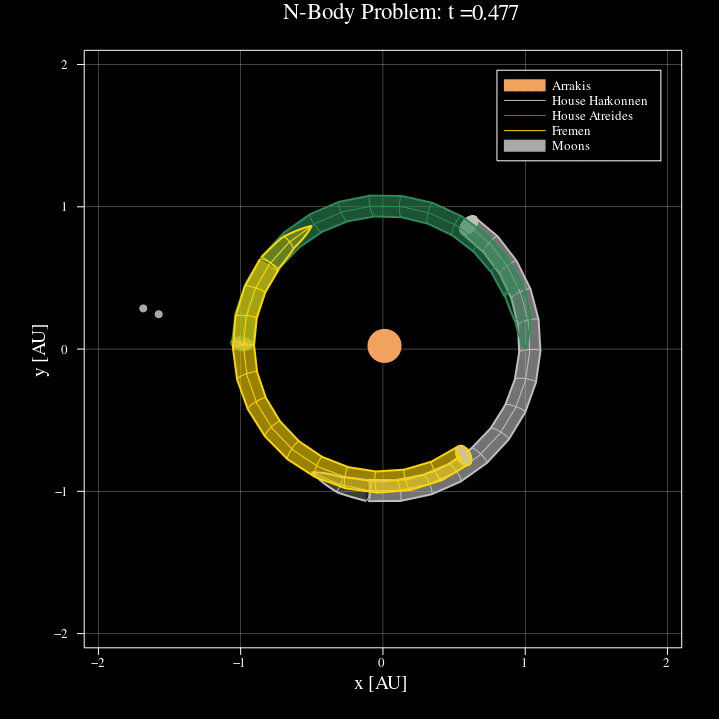

In [41]:
#visualize our solution
yearSec = 365*24*3600; labels = ["Arrakis","House Harkonnen","House Atreides","Fremen","Moons",""]; colors = [:sandybrown,:silver,:seagreen,:gold,:darkgrey,:darkgrey]
dRescale = 1.5e11#

function relative(p::Plots.Subplot, rx, ry) #so I can plot in relative to parent
   xlims=Plots.xlims(p)
   ylims=Plots.ylims(p)
   return xlims[1]+rx*(xlims[2]-xlims[1]), ylims[1]+ry*(ylims[2]-ylims[1])
end

@gif for i=16:length(t)
    print("$(@sprintf("%.2f",i/length(t)*100)) % complete\r")
    coords = coordsRecord[i] #xlims=(coords[1][1]/dRescale-2.1,coords[1][1]/1.5e11+2.1),ylims=(coords[2][1]/1.5e11-2.1,coords[2][1]/1.5e11+2.1)
    p1=plot(size=(720,720),widen=false,aspect_ratio=:equal,xlabel="x [AU]",ylabel="y [AU]",title="N-Body Problem: t = ",xlims=(-2.1,2.1),ylims=(-2.1,2.1),
    background_color=:black,gridalpha=0.5,minorgridalpha=0.3,framestyle=:box,margins=4mm,titlefonthalign=:left,titlefontsize=14,guidefontsize=10,labelfontsize=12,fontfamily="times",tickdirection=:out)
    tX,tY=relative(p1[1],0.65,1.064)#static coords for time relative to parent
    p1=annotate!([(tX,tY,("$(round(t[i]/(yearSec),sigdigits=3))",14,:white,:left))]) #because it really annoys me when the title bounces around as the number changes
    for n=1:length(coords[1])
        label = labels[n]; ms = n==1 ? 20 : 5; c = colors[n]; marker = n==1 ? :circle : :dot
        if n == 1
            p1=scatter!([coords[1][n]/dRescale],[coords[2][n]/dRescale],label=label,marker=marker,c=c,markerstrokewidth=0,markersize=ms,fill=true)
        elseif n >= length(coords[1])-1
            p1=scatter!([coords[1][n]/dRescale],[coords[2][n]/dRescale],label=label,marker=marker,c=c,markerstrokewidth=0,markersize=ms,fill=true)
        else
            x = reverse([coordsRecord[j][1][n] for j=i-15:i]); y = reverse([coordsRecord[j][2][n] for j=i-15:i])
            p1 = makeShaiHulud(p,x./dRescale,y./dRescale,lw=20,r=0.075,c=c)
            p1 = plot!(x[2:end]./dRescale,y[2:end]./dRescale,c=c,label=label)
        end
    end
end #every 10

In [212]:
function makeAnim(clean=true)
    run(`ffmpeg -framerate 30 -i "tmpPlots/frame_%06d.png" -c:v libx264 -preset slow -coder 1 -movflags +faststart -g 15 -crf 18 -pix_fmt yuv420p -profile:v high -y -bf 2 -vf "scale=720:720,setdar=1/1" "Dune.mp4"`)
    if clean==true
        println("cleaning up png files")
        foreach(rm,[string("tmpPlots/",x) for x in filter(endswith(".png"),readdir("tmpPlots"))])
    end
end

function relative(p::Plots.Subplot, rx, ry) #so I can plot in relative to parent
   xlims=Plots.xlims(p)
   ylims=Plots.ylims(p)
   return xlims[1]+rx*(xlims[2]-xlims[1]), ylims[1]+ry*(ylims[2]-ylims[1])
end

function makeDuneAnim(tTarget,mOut=1,maxIter=100)
    tFinal = 0.; iter = 0; yearSec = 365*24*3600; coordsRecord = []; massRecord = []; t = []
    while tFinal <= tTarget && iter < maxIter
        R = [0.06*1.5e11 for i=1:6]; R[1] = 0.2*1.5e11; R[end-2:end] .= 0.05;
        coordsRecord,massRecord,t = genNBodyResults(6,tTarget,tTarget*20000+1,5,R,mOut); #10,000 steps/year 
        tFinal = (t[end]+t[2]-t[1])/yearSec #often mOut cut can result in being slightly less than requested, so add 1 more dt
        iter += 1
        print("iteration $iter failed with tFinal = $(round(tFinal,digits=2)) years \r")
    end
    println("generated a solution lasting $tFinal years after $iter iterations; making plot")
    labels = ["Arrakis","House Harkonnen","House Atreides","Fremen","Moons",""]; colors = [:sandybrown,:silver,:seagreen,:dodgerblue,:darkgrey,:darkgrey]
    dRescale = 1.5e11#
    frameNum = 1
    numStars=250
    starsX=zeros(numStars)
    starsY=zeros(numStars)
    for i=1:numStars
        num=rand(Uniform(-3.5,3.5),2) #box size is 2 AU but we need some extra padding for movement
        starsX[i]=num[1]
        starsY[i]=num[2]
    end
    for i=999*3*mOut+1:333*mOut:length(t)
        print("$(@sprintf("%.2f",i/length(t)*100)) % complete\r")
        coords = coordsRecord[i] #xlims=(coords[1][1]/dRescale-2.1,coords[1][1]/1.5e11+2.1),ylims=(coords[2][1]/1.5e11-2.1,coords[2][1]/1.5e11+2.1)
        title = t[i]/yearSec > 10 ? "Dune-Body Problem: t =           years" : "Dune-Body Problem: t =         years"
        p1=plot(size=(720,721),widen=false,aspect_ratio=:equal,xlabel="x [AU]",ylabel="y [AU]",title=title,xlims=(-3.1,3.1),ylims=(-3.1,3.1),grid=false,background_color_legend=:transparent,foreground_color_legend=:transparent,
        background_color=:black,gridalpha=0.5,minorgridalpha=0.3,framestyle=:box,margins=4mm,titlefonthalign=:left,titlefontsize=14,guidefontsize=10,labelfontsize=12,fontfamily="times",tickdirection=:out)
        p1 = scatter!(starsX,starsY,c=:orangered,ms=rand(Uniform(0.1,2),numStars),label="",marker=:dot,markerstrokewidth=0) #fake stars but make them spice, varied sizes
        tX,tY=relative(p1[1],0.615,1.064)#static coords for time relative to parent
        p1=annotate!([(tX,tY,("$(round(t[i]/(yearSec),digits=2))",14,:white,:left))]) #because it really annoys me when the title bounces around as the number changes
        for n=1:length(coords[1])
            label = labels[n]; ms = n==1 ? 25 : 5; c = colors[n]; marker = n==1 ? :circle : :dot
            if n == 1
                p1=scatter!([coords[1][n]/dRescale],[coords[2][n]/dRescale],label=label,marker=marker,c=c,markerstrokewidth=0,markersize=ms,fill=true)
            elseif n >= length(coords[1])-1
                p1=scatter!([coords[1][n]/dRescale],[coords[2][n]/dRescale],label=label,marker=marker,c=c,markerstrokewidth=0,markersize=ms,fill=true)
            else
                x = reverse([coordsRecord[j][1][n] for j=i-999*3*mOut:33*5*mOut:i]); y = reverse([coordsRecord[j][2][n] for j=i-999*3*mOut:33*5*mOut:i])
                p1 = makeShaiHulud(p,x./dRescale,y./dRescale,lw=16,r=0.075,c=c)
                p1 = plot!(x[2:end]./dRescale,y[2:end]./dRescale,c=c,label=label)
            end
        end
        png(p1,@sprintf("tmpPlots/frame_%06d.png",frameNum))
        frameNum += 1
    end 
    println("frames generated, making mp4")
    makeAnim()
end

makeDuneAnim (generic function with 3 methods)

In [ ]:
makeDuneAnim(60,1,1000)

generated a solution lasting 60.00005000007014 years after 128 iterations; making plot


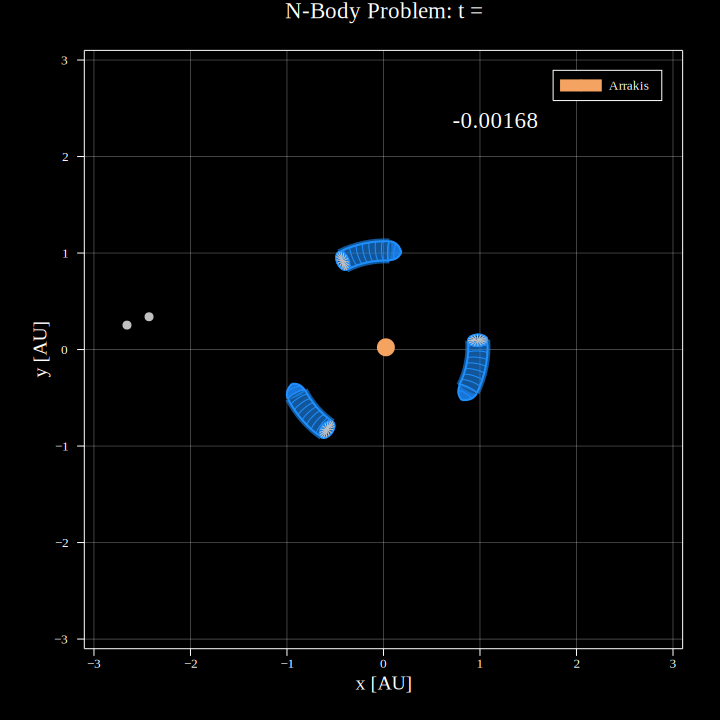

In [211]:
p1=plot(size=(720,720),widen=false,aspect_ratio=:equal,xlims=(-3.1,3.1),ylims=(-3.1,3.1),xlabel="x [AU]",ylabel="y [AU]",title="N-Body Problem: t = ",
background_color=:black,gridalpha=0.5,minorgridalpha=0.3,framestyle=:box,margins=4mm,titlefonthalign=:left,titlefontsize=14,guidefontsize=10,labelfontsize=12,fontfamily="times",tickdirection=:out)
p1=annotate!([(0.715,2.375,("$(round(t[1]/yearSec,sigdigits=3))",14,:white,:left))]) #because it really annoys me when the title bounces around as the number changes
i = 999
coords = coordsRecord[i]
for n=1:length(coords[1])
    label = n==1 ? "Arrakis" : "Shai-Hulud"; ms = n==1 ? 10 : 2; c = n==1 ? :sandybrown : :dodgerblue; marker = n==1 ? :circle : :dot
    labels = ["Arrakis","House Atreides","House Harkonnn"]
    if n == 1
        p1=scatter!([coords[1][n]/1.5e11],[coords[2][n]/1.5e11],label=label,marker=marker,c=c,markerstrokewidth=0,markersize=ms,fill=true)
    elseif n >= length(coords[1])-1
        p1=scatter!([coords[1][n]/1.5e11],[coords[2][n]/1.5e11],label="",marker=marker,c=:silver,markerstrokewidth=0,markersize=5,fill=true)
    else
        x = reverse([coordsRecord[j][1][n] for j=i-100:10:i]); y = reverse([coordsRecord[j][2][n] for j=i-100:10:i])
        p1 = makeShaiHulud(p,x./1.5e11,y./1.5e11,lw=25,r=0.1)
    end
end
display(p1)